In [1]:
import os
import math
import random
import warnings
import numpy as np
import pandas as pd 
from sklearn import metrics
from matplotlib import pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
# data=pd.read_csv(r"C:\Workplace\C++\d2ome_restructure\d2ome_restructure\d2ome_GUI\d2ome_GUI\v2\bin\Debug\Estimated_AA_neh_numbers_liverpool_liver_.csv")
# data=data.dropna()
# data=data.sort_values(by="Tritium")
# print(data.shape)
# data['symbol']=[x.split('(')[1].replace(')','') for x in data.AA_name]
# data.head(20)

In [3]:
# data.corr()

In [4]:
# Asym_NEH=abs(data.Tritium - data.Asym_NEH)/data.Tritium
# print('Asym_NEH',np.median(Asym_NEH),np.std(Asym_NEH))

# APE=abs(data.Tritium - data.APE)/data.Tritium
# print('APE',np.median(APE),np.std(APE))

# MPE=abs(data.Tritium - data.MPE)/data.Tritium
# print('MPE',np.median(MPE),np.std(MPE))

In [5]:
data2=pd.read_csv(r"Estimated_AA_neh_numbers_utmb-liver_.csv")
# data2=data2.dropna()
data2=data2.sort_values(by="Tritium")
print(data2.shape)
data2['symbol']=[x.split('(')[1].replace(')','') for x in data2.AA_name]
data2.head(20)

(20, 8)


,AA_name,Tritium,Asym_NEH,APE,MPE,Asym_NEH_ci,APE_ci,MPE_ci,symbol
18,Tryptophan (W),0.08,0.286613,0.177528,0.153788,0.322398,0.353235,0.455390,W
16,Threonine (T),0.20,0.139199,0.350990,0.126798,0.113790,0.127329,0.163088,T
4,Phenylalanine (F),0.32,0.499211,0.663539,0.486353,0.149117,0.166668,0.217260,F
19,Tyrosine (Y),0.42,0.941252,1.118158,0.872977,0.170513,0.189794,0.257748,Y
8,lysine (K),0.54,0.388783,0.397155,0.172724,0.236092,0.271216,0.325495,K
17,Valine (V),0.56,0.535713,0.504387,0.461171,0.103278,0.114438,0.141972,V
9,Leucine (L),0.60,0.777495,0.804156,0.760074,0.092332,0.101178,0.130042,L
7,Isoleucine (I),1.00,0.536846,0.546177,0.487066,0.122426,0.133009,0.179985,I
10,Methionine (M),1.12,0.970998,0.850121,1.114628,0.192950,0.232448,0.258629,M
1,Cysteine (C),1.62,2.162507,2.200247,2.437425,0.239694,0.277198,0.314578,C


In [6]:
data2.corr()

,Tritium,Asym_NEH,APE,MPE,Asym_NEH_ci,APE_ci,MPE_ci
Tritium,1.000000,0.887397,0.874415,0.879580,-0.181645,-0.175285,-0.200228
Asym_NEH,0.887397,1.000000,0.997736,0.995596,-0.229668,-0.220127,-0.261110
APE,0.874415,0.997736,1.000000,0.994273,-0.256951,-0.248000,-0.287065
MPE,0.879580,0.995596,0.994273,1.000000,-0.268840,-0.256228,-0.302317
Asym_NEH_ci,-0.181645,-0.229668,-0.256951,-0.268840,1.000000,0.996933,0.995347
APE_ci,-0.175285,-0.220127,-0.248000,-0.256228,0.996933,1.000000,0.989391
MPE_ci,-0.200228,-0.261110,-0.287065,-0.302317,0.995347,0.989391,1.000000


In [7]:
Asym_NEH=abs(data2.Tritium - data2.Asym_NEH)/data2.Tritium
print('Asym_NEH',np.median(Asym_NEH),np.std(Asym_NEH))

APE=abs(data2.Tritium - data2.APE)/data2.Tritium
print('APE',np.median(APE),np.std(APE))

MPE=abs(data2.Tritium - data2.MPE)/data2.Tritium
print('MPE',np.median(MPE),np.std(MPE))

Asym_NEH 0.3172642861958107 0.5564989059248313
APE 0.36650958726262617 0.4110380815930587
MPE 0.35928105144007794 0.2898022133887045


In [8]:
aa_sh_name={'Q':'Gln (Q)','N':'Asn (N)','S':'Ser (S)','G':'Gly (G)','T':'Thr (T)','A':'Ala (A)','D':'Asp (D)','P':'Pro (P)',
            'M':'Met (M)','V':'Val (V)','E':'Glu (E)','H':'His (H)','K':'Lys (K)','L':'Leu (L)','I':'Ile (I)','F':'Phe (F)',
            'C':'Cys (C)','Y':'Tyr (Y)','R':'Arg (R)','W':'Trp (W)',}

In [9]:
def plot_neh_aa(input_data,filename):
    cols=['Asym_NEH', 'APE', 'MPE']
    col_cis=['Asym_NEH_ci', 'APE_ci','MPE_ci']
    plt.rc('font', size=17) 
    plt.rc('figure', figsize=(18,7)) 
    plt.errorbar(range(0,40,2), input_data['Tritium'], [0]*20,fmt ='*',mfc='r',color="r",ms=10)
    
    cs=['m','b','g']
#     label=['Asymp', 'APE', 'MPE']
    label=[r"${N_{EH}},using\: the\: monoisotopic\: RIA\: at\: the\: plateau\: of\: labeling$",
           r"${N_{EH}},\:residual \:sum \:of \:squares$",
            r"${N_{EH}},molecular\:percent\:enrichment\:of\:mass\:isotopomers$"]
    
    for i in range(3):
        col=cols[i]
        col_ci=col_cis[i] 
        if i ==0: k=-1
        else: k= i
            
        print("============> ",col,"\t")
        plt.errorbar([x+0.3*k for x in range(0,40,2)], input_data[col], input_data[col_ci],
                     fmt ='o',mfc=cs[i],color=cs[i],ms=6,label=label[i],capsize=5)
    
#     plt.xticks(range(0,40,2),input_data.AA_name,rotation=90)
    plt.xticks(range(0,40,2),[aa_sh_name[x] for x in input_data.symbol],rotation=90)
    plt.ylabel("Number of exchangeable hydrogens")    
    
    plt.legend()
    plt.savefig(filename+"_CI.jpeg",dpi=900,bbox_inches='tight')
    plt.show()

============>  Asym_NEH 	
============>  APE 	
============>  MPE 	


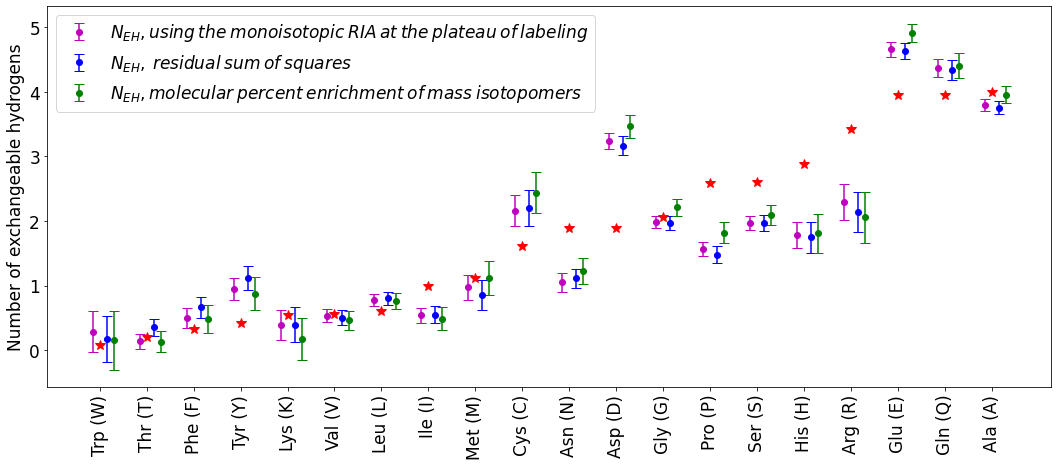

In [10]:
# plot_neh_aa(data,'lv')
plot_neh_aa(data2,'utmb')

============>  Asym_NEH 	
============>  APE 	
============>  MPE 	


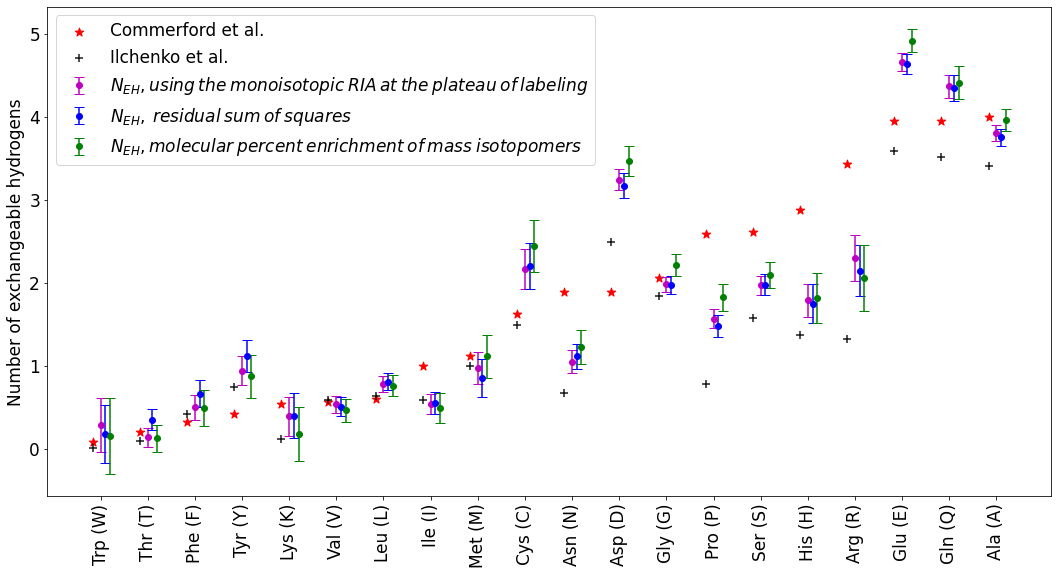

In [11]:
il={'A':3.41,     'C':1.49,     'D':2.490,     'E':3.58,     'F':0.418,     'G':1.844,    'H':1.372,     'I':0.592,
     'K':0.121,     'L':0.634,     'M':0.994,     'N':0.674,    'P':0.78,     'Q':3.517,     'R':1.326,     'S':1.574,
     'T':0.097,    'V':0.591,     'W':0.003,     'Y':0.74}
ck={'Q':3.67,'N':0.69,'S':1.61,'G':1.34,'T':0.10,'A':4.59,'D':2.55,'P':0.57,'M':1.02,'V':0.78,'E':3.67,
    'H':1.40,'K':0.12,'L':1.30,'I':0.76,'F':0.84,'C':1.53,'Y':0.75,'R':1.36,'W':0.00,}
data2["il"]=[il[c] for c in data2.symbol]
data2["ck"]=[ck[c] for c in data2.symbol]

def plot_neh_aa(input_data,filename):
    cols=['Asym_NEH', 'APE', 'MPE']
    col_cis=['Asym_NEH_ci', 'APE_ci','MPE_ci']
    plt.rc('font', size=17) 
    plt.rc('figure', figsize=(18,9)) 
#     plt.errorbar(range(0,40,2), input_data['Tritium'], [0]*20,fmt ='*',mfc='r',color="r",ms=10,label='Commerford et al.')
    
    
    temp_x=[x-0.5 for x in range(0,60,3)]    
    plt.scatter(temp_x, input_data['Tritium'],marker='*',s=80, color="r",label='Commerford et al.')    
    plt.scatter(temp_x, input_data['il'],marker='+',s=80, color="k",alpha=0.9,label='Ilchenko et al.')
#     plt.scatter(temp_x, input_data['ck'],marker='x',s=80, color="k",alpha=0.7,label='Peinado‐Izaguerri, Jorge, et al.')
    
    cs=['m','b','g']
    label=['Asymp', 'APE', 'MPE']
    
    label=[r"${N_{EH}},using\: the\: monoisotopic\: RIA\: at\: the\: plateau\: of\: labeling$",
           r"${N_{EH}},\:residual \:sum \:of \:squares$",
            r"${N_{EH}},molecular\:percent\:enrichment\:of\:mass\:isotopomers$"]
    
    
    for i in range(3):
        col=cols[i]
        col_ci=col_cis[i] 
        k=i
#         if i ==0: k=-1
#         else: k= i
            
        print("============> ",col,"\t")
        plt.errorbar([x+0.3*k for x in range(0,60,3)], input_data[col], input_data[col_ci],
                     fmt ='o',mfc=cs[i],color=cs[i],ms=6,label=label[i],capsize=5)
    
#     plt.xticks(range(0,60,3),input_data.AA_name,rotation=90)
    plt.xticks(range(0,60,3),[aa_sh_name[x] for x in input_data.symbol],rotation=90)
    plt.ylabel("Number of exchangeable hydrogens")    
    
    plt.legend()
#     plt.grid()
    plt.savefig(filename+"_CI.jpeg",dpi=900,bbox_inches='tight')
    plt.show()
    
plot_neh_aa(data2,'utmb2')

In [12]:
def get_stat(col):
    temp=abs(data2['Tritium'] - data2[col])
    print(col,'\t',np.median(temp),np.std(temp))
get_stat('Asym_NEH')
get_stat('MPE')
get_stat('APE')

Asym_NEH 	 0.4380282432047583 0.3978776593285222
MPE 	 0.4557359889855942 0.4472142597433737
APE 	 0.4223675537731774 0.3987364121722412


In [13]:
def get_rd(col):
    temp=data2[data2.symbol=='D']
    print(abs((float)((temp['Tritium'] - temp[col])/temp['Tritium'])))
get_rd('Asym_NEH')
get_rd('MPE')
get_rd('APE')

0.7124542265034604
0.8336081037758996
0.6770927582644973


In [14]:
data2['sh_name']=[aa_sh_name[a] for a in data2.symbol]

In [15]:
data2.sort_values(by='symbol').to_csv("table.csv")